# Linear Regression 

## import library

In [100]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [101]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]
print(xx.shape,yy.shape,zz.shape)
print(data.shape)

(2500,) (2500,) (2500,)
(2500, 3)


## plot the data in the three dimensional space

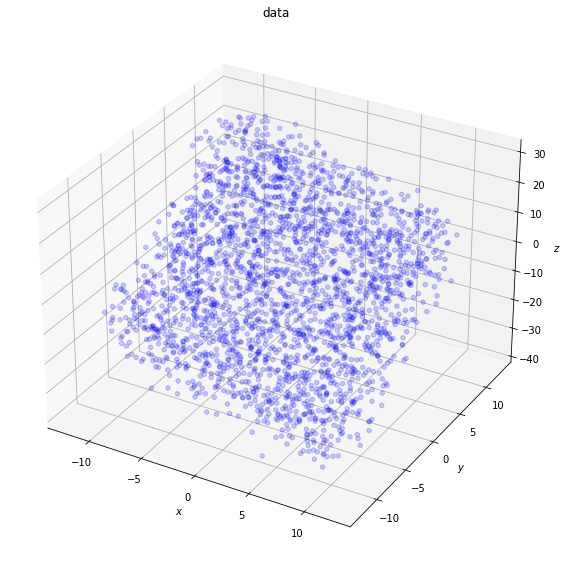

In [102]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [103]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    num_data = x.shape
    fun = theta[0]+theta[1]*x+theta[2]*y
    residual = z - fun
    # ============================
    return residual, num_data

In [104]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    residual,num_data = compute_residual(theta, x, y, z)
    loss = np.sum(residual*residual)
    loss = loss/num_data
    
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [105]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    X = np.ones((num_data,1))
    X = np.hstack([X,np.reshape(x,(num_data,1))])
    X = np.hstack([X,np.reshape(y,(num_data,1))])
    
    grad = (X.T@(X@theta-z))/num_data
    # ============================
    return grad

## gradient descent for each model parameter

In [106]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration) 

for i in range(num_iteration):
    theta = theta - learning_rate*compute_gradient(theta, xx, yy, zz)
    loss = compute_loss(theta,xx,yy,zz)
    
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss
    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))
    

iteration =    0, loss = 92.16846
iteration =    1, loss = 51.41323
iteration =    2, loss = 34.50395
iteration =    3, loss = 27.43173
iteration =    4, loss = 24.41868
iteration =    5, loss = 23.08172
iteration =    6, loss = 22.43792
iteration =    7, loss = 22.08186
iteration =    8, loss = 21.84627
iteration =    9, loss = 21.66213
iteration =   10, loss = 21.50095
iteration =   11, loss = 21.35093
iteration =   12, loss = 21.20717
iteration =   13, loss = 21.06763
iteration =   14, loss = 20.93143
iteration =   15, loss = 20.79817
iteration =   16, loss = 20.66765
iteration =   17, loss = 20.53977
iteration =   18, loss = 20.41445
iteration =   19, loss = 20.29163
iteration =   20, loss = 20.17126
iteration =   21, loss = 20.05329
iteration =   22, loss = 19.93766
iteration =   23, loss = 19.82433
iteration =   24, loss = 19.71326
iteration =   25, loss = 19.60440
iteration =   26, loss = 19.49771
iteration =   27, loss = 19.39314
iteration =   28, loss = 19.29065
iteration =   

iteration =  658, loss = 14.24290
iteration =  659, loss = 14.24290
iteration =  660, loss = 14.24290
iteration =  661, loss = 14.24290
iteration =  662, loss = 14.24290
iteration =  663, loss = 14.24290
iteration =  664, loss = 14.24290
iteration =  665, loss = 14.24290
iteration =  666, loss = 14.24290
iteration =  667, loss = 14.24290
iteration =  668, loss = 14.24290
iteration =  669, loss = 14.24290
iteration =  670, loss = 14.24290
iteration =  671, loss = 14.24290
iteration =  672, loss = 14.24290
iteration =  673, loss = 14.24290
iteration =  674, loss = 14.24290
iteration =  675, loss = 14.24290
iteration =  676, loss = 14.24290
iteration =  677, loss = 14.24290
iteration =  678, loss = 14.24290
iteration =  679, loss = 14.24290
iteration =  680, loss = 14.24290
iteration =  681, loss = 14.24290
iteration =  682, loss = 14.24290
iteration =  683, loss = 14.24290
iteration =  684, loss = 14.24290
iteration =  685, loss = 14.24290
iteration =  686, loss = 14.24290
iteration =  6

In [107]:
f = theta[0] + theta[1] * xx + theta[2] * yy

## plot the results

In [108]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    plt.plot(loss_iteration, color = 'red')
    
    # ============================
    plt.tight_layout()
    plt.show()

In [109]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====
    plt.plot(xx, yy, zz, '.', color = 'blue')

    # ============================    
    plt.tight_layout()
    plt.show()

In [110]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====
    theta_iteration=theta_iteration.T
    plt.plot(theta_iteration[0], color = 'red')
    plt.plot(theta_iteration[1], color = 'green')
    plt.plot(theta_iteration[2], color = 'blue')

    # ============================
    plt.tight_layout()
    plt.show()

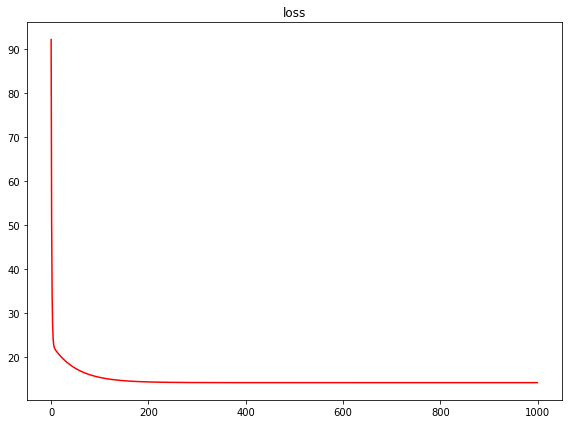

In [111]:
plot_loss_curve(loss_iteration)

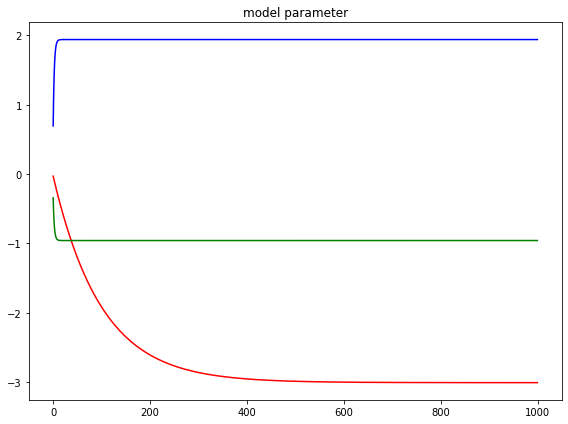

In [112]:
plot_model_parameter(theta_iteration)

In [115]:
# ===== FILL UP THE CODE =====
XX  = np.arange(-15, 15, 0.1)
YY  = np.arange(-15, 15, 0.1)
    
XX,YY = np.meshgrid(XX,YY)

ZZ = np.zeros((len(XX),len(YY)))

for i in range(len(XX)):
    for j in range(len(YY)):
        ZZ[i][j] = theta[0]+theta[1]*XX[i][j]+theta[2]*YY[i][j]
print(ZZ.shape)
# ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')
    ax  = plt.axes(projection='3d')
    
    # ===== FILL UP THE CODE =====
    ax.plot_surface(XX, YY, ZZ,alpha = 0.3)
    
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

    # ============================
    
    plt.tight_layout()
    plt.show()

(300, 300)


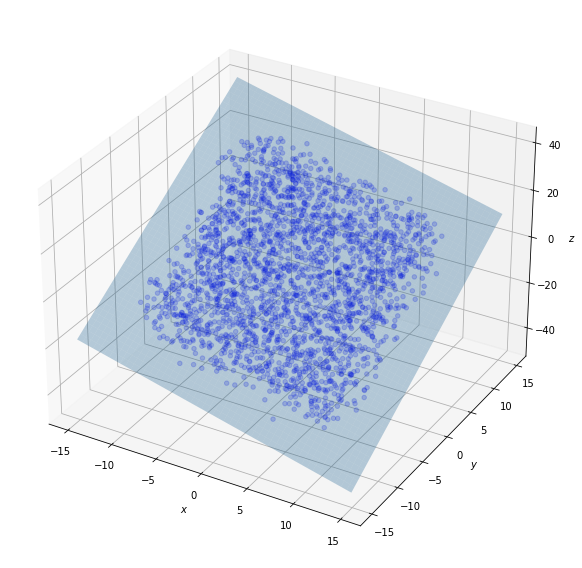

In [116]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

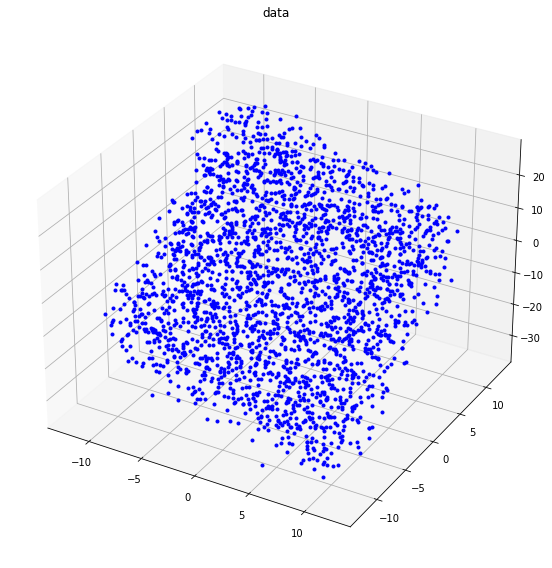

In [117]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

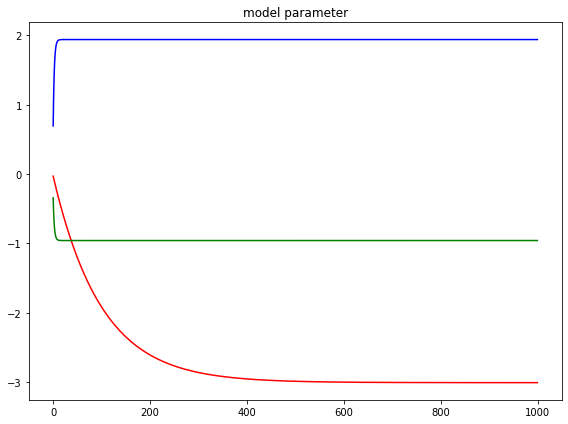

In [118]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

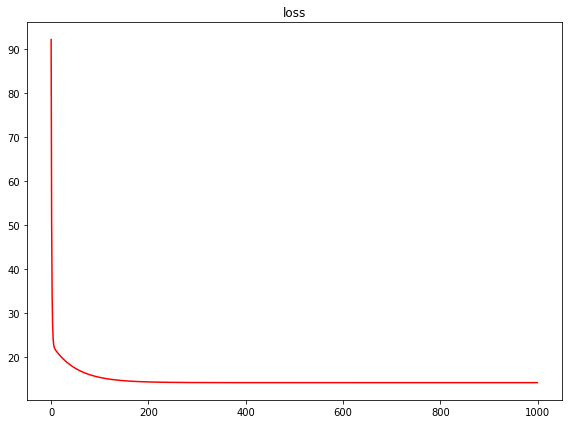

In [119]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

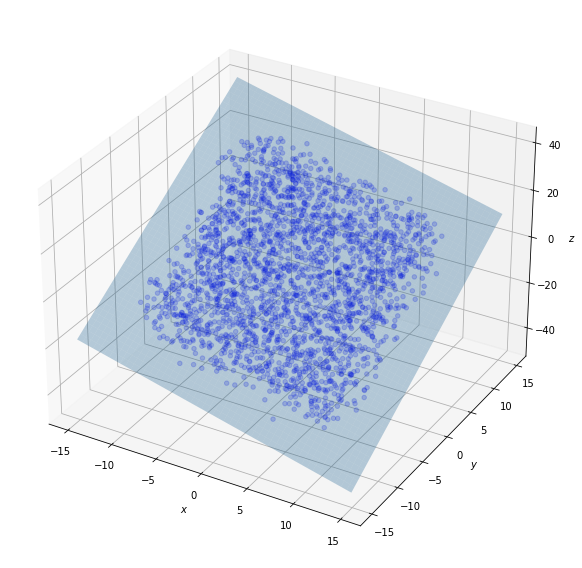

In [120]:
plot_surface(XX, YY, ZZ, xx, yy, zz)